In [45]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE

df = pd.read_csv(r"C:\Users\adix9\Downloads\bank\bank.csv", sep =";")

In [46]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [47]:
df["y"].value_counts(normalize=True)

no     0.88476
yes    0.11524
Name: y, dtype: float64

SMOTE analysis required as the target data is imbalanced

In [48]:
df["job"].value_counts(normalize = True)

management       0.214333
blue-collar      0.209246
technician       0.169874
admin.           0.105729
services         0.092236
retired          0.050874
self-employed    0.040478
entrepreneur     0.037160
unemployed       0.028312
housemaid        0.024773
student          0.018580
unknown          0.008405
Name: job, dtype: float64

We can do One-Hot-Encoding for Job categories. As we can see, there are very few instances of value unknown. We might drop that column.

In [49]:
df = pd.concat([df,pd.get_dummies(df['job'], prefix='job')],axis=1)
df = df.drop('job', axis =1)
df = df.drop('job_unknown', axis = 1)
df.shape

(4521, 27)

Either use onehot encoding or get rid of some categories in order to make label encoding more effective. because the number of attributes is small, we might as well use one-hot encodng to avoid loss of information

In [50]:
df["marital"].value_counts(normalize = True)

married     0.618668
single      0.264543
divorced    0.116788
Name: marital, dtype: float64

Label encoding can be used in this case because we don't have many categories.

In [51]:
df["education"].value_counts(normalize = True)

secondary    0.510064
tertiary     0.298607
primary      0.149967
unknown      0.041363
Name: education, dtype: float64

Highest number of records show secondary education level. The unknown category can then be replaced by mode of the data also because very few records have the value "unknown" for this attribute

In [52]:
df["default"].value_counts(normalize = True)

no     0.98319
yes    0.01681
Name: default, dtype: float64

This attribute does not have significant variation. If it turns out there is not much correlation between this and the target variable, we can drop this attribute.

In [53]:
df["housing"].value_counts(normalize = True)

yes    0.566025
no     0.433975
Name: housing, dtype: float64

There is almost an equivalence between the number of occurrences of each of the categories

In [54]:
df["loan"].value_counts(normalize = True)

no     0.847158
yes    0.152842
Name: loan, dtype: float64

In [55]:
df["contact"].value_counts(normalize = True)

cellular     0.640566
unknown      0.292856
telephone    0.066578
Name: contact, dtype: float64

In [56]:
df["day"].value_counts(normalize = True)

20    0.056846
18    0.049989
19    0.044459
21    0.043796
14    0.043132
17    0.042247
7     0.042026
6     0.041363
28    0.040035
5     0.040035
8     0.039814
29    0.038708
15    0.038487
30    0.037160
13    0.036718
16    0.036275
9     0.036054
11    0.033621
12    0.033400
4     0.030745
2     0.025216
27    0.024994
26    0.024331
3     0.023225
23    0.022561
22    0.019022
25    0.017695
31    0.013050
10    0.011060
24    0.007963
1     0.005972
Name: day, dtype: float64

All the values are almost equally distributed. 

In [57]:
df["poutcome"].value_counts(normalize=True)

unknown    0.819509
failure    0.108383
other      0.043574
success    0.028534
Name: poutcome, dtype: float64

The value of this attribute for most of the instances is unknown. 

The numerical variables will be analysed with the help of distplot and boxplot

In [58]:
df["previous"].value_counts(normalize = True)

0     0.819509
1     0.063260
2     0.042690
3     0.024994
4     0.017253
5     0.010396
6     0.005530
7     0.004866
8     0.003981
9     0.002212
12    0.001106
10    0.000885
11    0.000664
14    0.000442
20    0.000221
24    0.000221
23    0.000221
13    0.000221
17    0.000221
19    0.000221
18    0.000221
22    0.000221
15    0.000221
25    0.000221
Name: previous, dtype: float64

It can be seen that there aren't many instances with a value other than 0

C:\Users\adix9\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


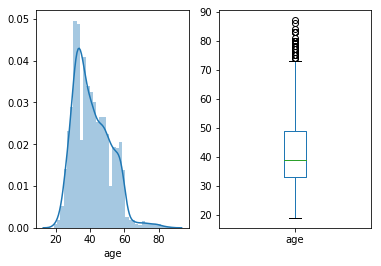

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(1)
plt.subplot(121)
sns.distplot(df['age'])
plt.subplot(122)
df['age'].plot.box()

It can be seen that the age data is not normally distributed and is slightly skewed to the right. We checked for outliers using the box plot. It can be seen that we need to deal with the outliers to normalize the data because algorithms work better with normal attributes.

C:\Users\adix9\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


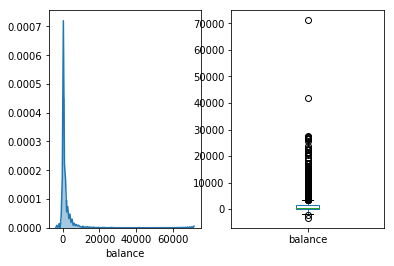

In [60]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['balance'])
plt.subplot(122)
df['balance'].plot.box()

We can see that the distribution of balance is highly left skewed. Normalizing this data is necessary in order for the algorithms to work well.


C:\Users\adix9\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


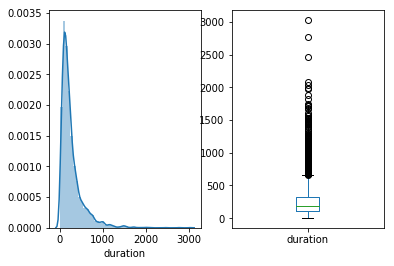

In [61]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['duration'])
plt.subplot(122)
df['duration'].plot.box()

C:\Users\adix9\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


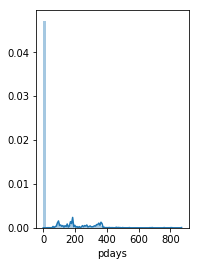

In [62]:
 plt.figure(1)
plt.subplot(121)
sns.distplot(df['pdays'])


This data too is scattered and needs to be normalized/ tandaardzed based on its correlation with the target variable

This all the univariate analysis that can be done. We do not have any ordinal attributes. We will now continue with the bivariate analysis.

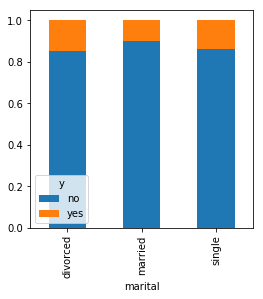

In [63]:
Marriage=pd.crosstab(df["marital"],df['y'])
Marriage.div(Marriage.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

From the graph it can be assumed that the target variable does not vary much with respect to categories of Marital status

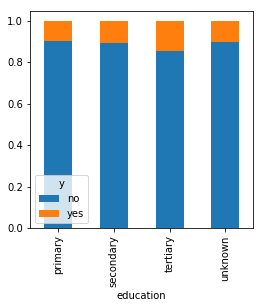

In [64]:
Edu=pd.crosstab(df["education"],df['y'])
Edu.div(Edu.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

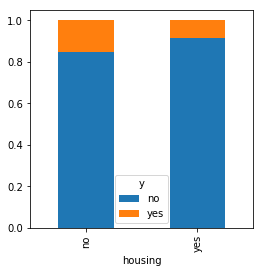

In [65]:
House=pd.crosstab(df["housing"],df['y'])
House.div(House.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

We can see that the "no" category of housing attribute has more number of yes class instances.

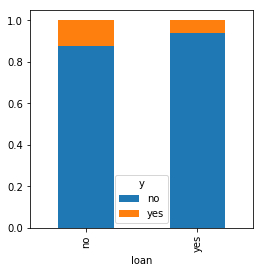

In [66]:
Loan=pd.crosstab(df["loan"],df['y'])
Loan.div(Loan.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

The proportion of subscribers without loan is more thsn thst with loan.

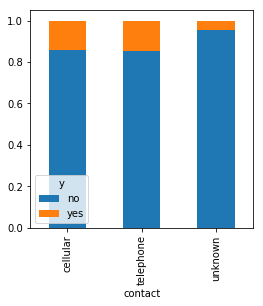

In [67]:
Con=pd.crosstab(df["contact"],df['y'])
Con.div(Con.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

People contacted via cellphone and telephone were responsive in the same proportion

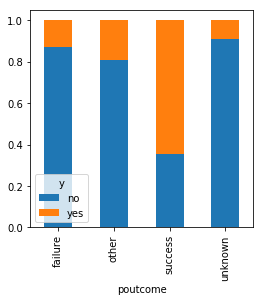

In [68]:
POC=pd.crosstab(df["poutcome"],df['y'])
POC.div(POC.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

We can see that the calls where the previous call succeeded, the current one succeeded in most of the cases. 

Checking the relationships between numerical attributes and the target value

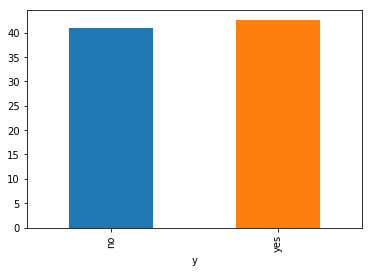

In [69]:
df.groupby('y')['age'].mean().plot.bar()

It can be observed that the mean age for both the classes of y is almost same, around 40

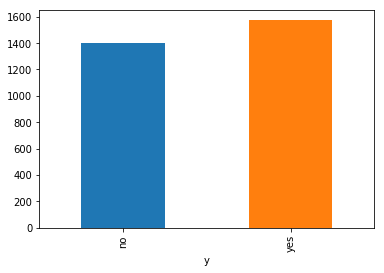

In [70]:
df.groupby('y')['balance'].mean().plot.bar()

We can divide the balance amounts into categories like high, low etc in order to analyse the actual relationship of balance and target class

df["balance"].describe()

In [71]:
bins = [0,70,450,1500,71200]
named = ['very low', 'low','high', 'very high']
df['bal_groups']=pd.cut(df['balance'],bins,labels = named)
print(df['bal_groups'].head())


0    very high
1    very high
2         high
3         high
4          NaN
Name: bal_groups, dtype: category
Categories (4, object): [very low < low < high < very high]


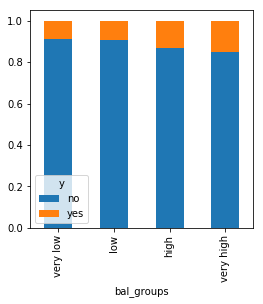

In [72]:
bal_group=pd.crosstab(df["bal_groups"],df['y'])
bal_group.div(bal_group.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

It can be inferred that the proportion of instances in the yes class is more for higher balances

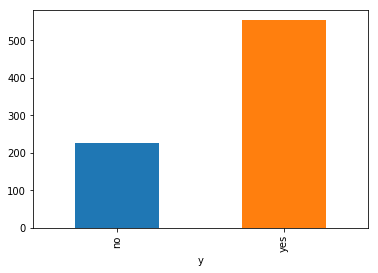

In [73]:
df.groupby('y')['duration'].mean().plot.bar()

We can observe that the avg duration of call for yes class is more than that for no.

In [74]:
df['y'].replace('yes',1,inplace = True)
df['y'].replace('no',0,inplace = True)
df['loan'].replace('yes', 1, inplace = True)
df['loan'].replace('no',0,inplace = True)
df['housing'].replace('yes', 0, inplace = True)
df['housing'].replace('no',1,inplace = True)
df['contact'].replace('cellular', 2, inplace = True)
df['contact'].replace('telephone',1,inplace = True)
df['contact'].replace('unknown',0,inplace = True)
df['poutcome'].replace('success', 3, inplace = True)
df['poutcome'].replace('other',2,inplace = True)
df['poutcome'].replace('unknown',0,inplace = True)
df['poutcome'].replace('failure',1,inplace = True)
df = df.drop('bal_groups', axis = 1)

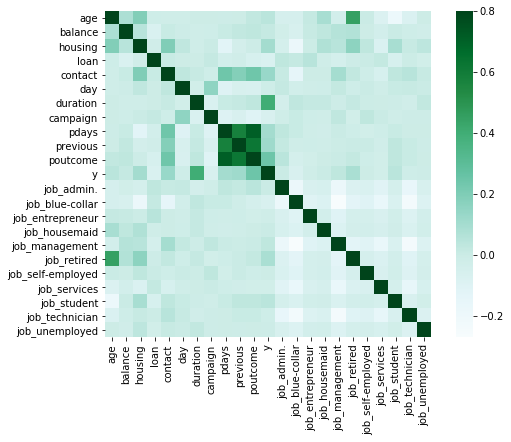

In [75]:
matrix = df.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuGn");

Previous is highly correlated with poutcome and pdays. Pdays is also correlated with poutcome. The target variable is least correlated with housing ad campaign

In [76]:
df.isnull().sum()

age                  0
marital              0
education            0
default              0
balance              0
housing              0
loan                 0
contact              0
day                  0
month                0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
y                    0
job_admin.           0
job_blue-collar      0
job_entrepreneur     0
job_housemaid        0
job_management       0
job_retired          0
job_self-employed    0
job_services         0
job_student          0
job_technician       0
job_unemployed       0
dtype: int64

We can see that there are no missing values

As seen above, there are 3 attributes -  duration, balance and age for which we must carry out the outlier treatment. From the heatmap, we know that there is correlation between y and these terms. Also, as there is no evidence of these values being erroneous, we choose to treat them instead of dropping them. We can do the treatment using log transformation. Using log transformation will keep the smaller values unaffected while lowering the higher values.

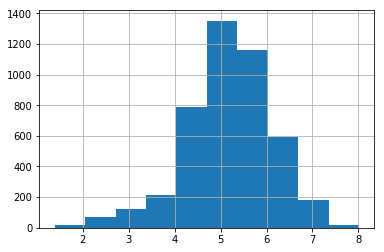

In [77]:
df['duration_log'] = np.log(df['duration'])
df['duration_log'].hist()

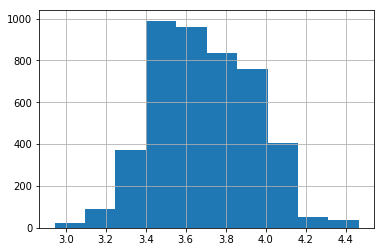

In [78]:
df['age_log'] = np.log(df['age'])
df['age_log'].hist(bins=10)

We can get rid of some columns based on the observed correlations. 


In [79]:
#df = df.drop('balance_log', axis = 1)
df.shape

(4521, 29)

In [80]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, [0,4,5,6,7,8,10,11,13,14,16,17,18,20,21,22,23,24,25,26,27,28]].values.reshape(4521,22)
y = df.iloc[:, 15].values.reshape(df.shape[0], 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 1)

In [81]:
sm = SMOTE(random_state=42)
X_train, y_train=sm.fit_resample(X_train,y_train)

C:\Users\adix9\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Modeling the prediction using logistic regression

We use this type of regression for classification when it is binary. It 

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
model = LogisticRegression(solver = 'lbfgs', max_iter = 500)
model.fit(X_train, y_train)
pred_cv = model.predict(X_test)
accuracy_score(y_test,pred_cv)

C:\Users\adix9\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.8090185676392573

In [83]:
roc_curve(y_test, pred_cv)

(array([0.        , 0.17813765, 1.        ]),
 array([0.        , 0.72027972, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [86]:
from sklearn.svm import SVC
svm_ = SVC(gamma='auto')
svm_.fit(X_train, y_train) 

pred_svm = svm_.predict(X_test)
accuracy_score(y_test,pred_svm)

0.8673740053050398

In [116]:
from sklearn.neural_network import MLPClassifier
nn_ = MLPClassifier(solver='lbfgs', alpha=2e-5, activation = 'relu',
                    hidden_layer_sizes=(5,4,3,2), random_state=1, max_iter = 650)
nn_.fit(X_train, y_train)
pred_nn = nn_.predict(X_test)
accuracy_score(y_test,pred_nn)

0.8735632183908046